In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlibinline

In [2]:
df=pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

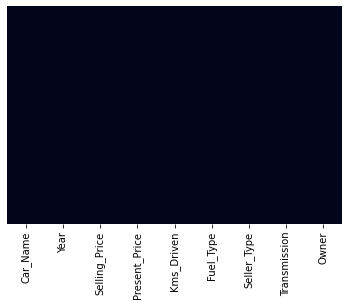

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

<function matplotlib.pyplot.show(close=None, block=None)>

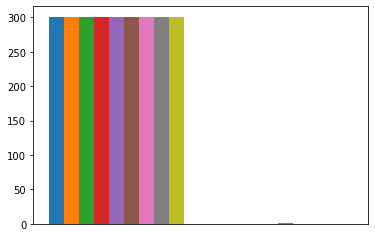

In [8]:
plt.hist(df,bins=2)
plt.show

In [9]:
cor= df.corr().abs()
cor

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,0.047584,0.524342,0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.088344
Present_Price,0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,0.524342,0.029187,0.203647,1.000000,0.089216
Owner,0.182104,0.088344,0.008057,0.089216,1.000000


<AxesSubplot:>

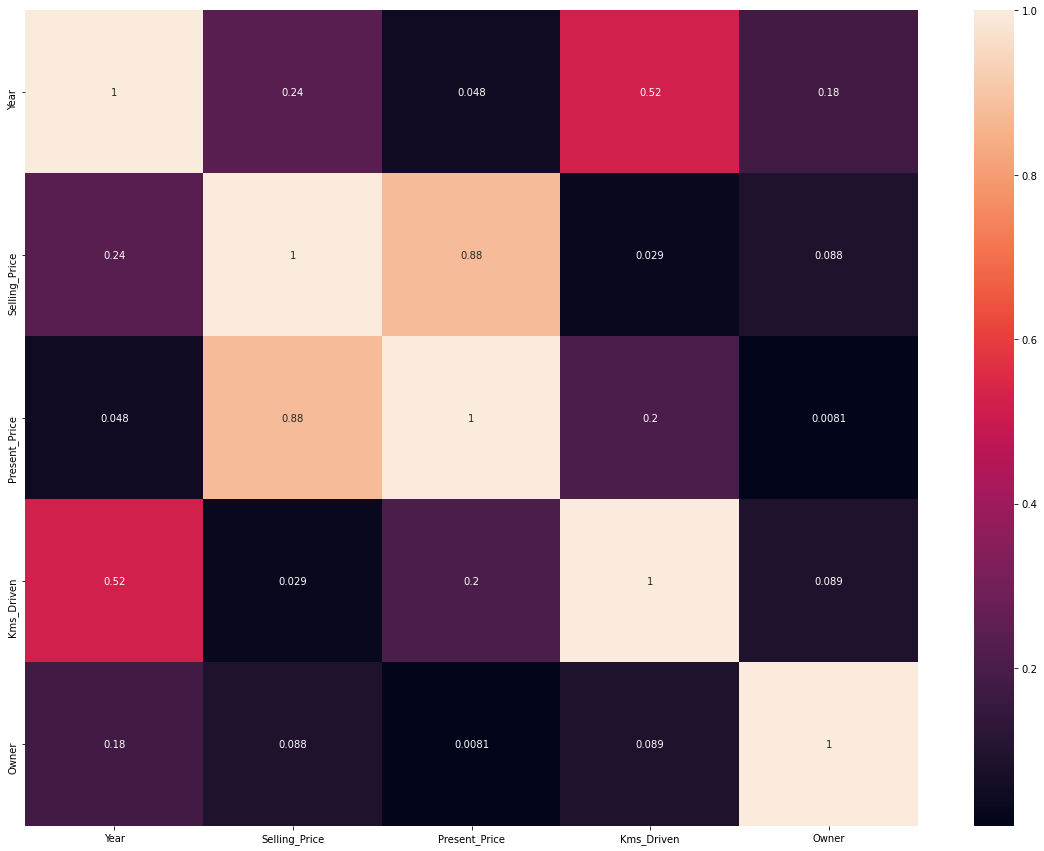

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)

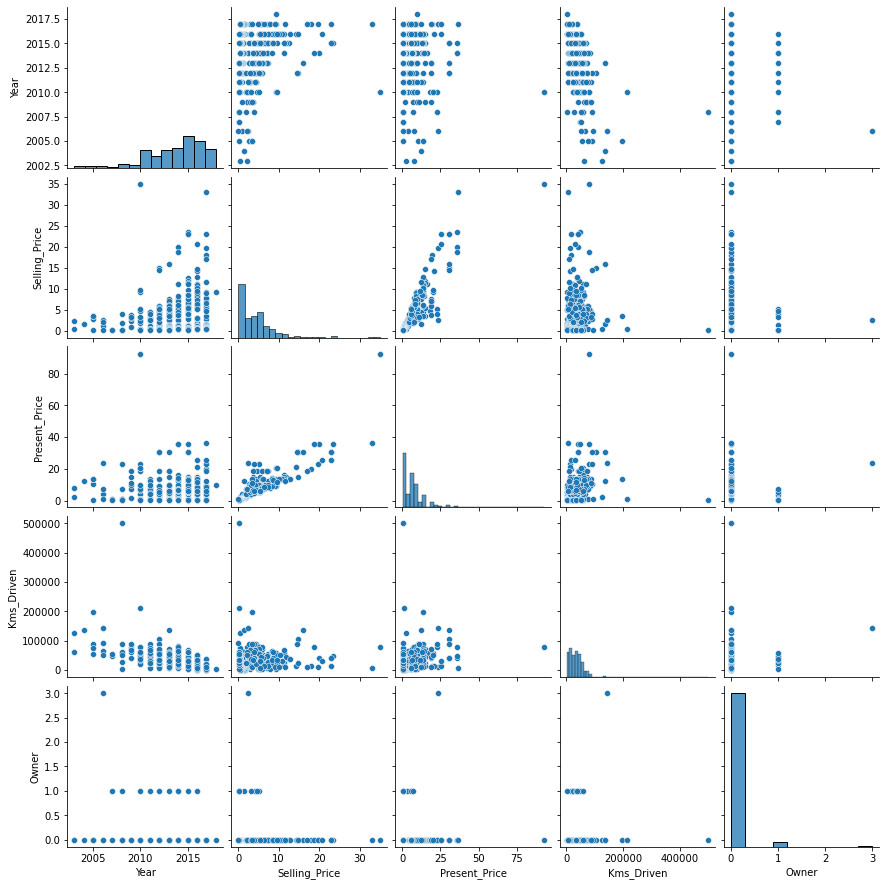

In [11]:
sns.pairplot(df)
plt.show()

<ipython-input-12-b9144f907a55>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


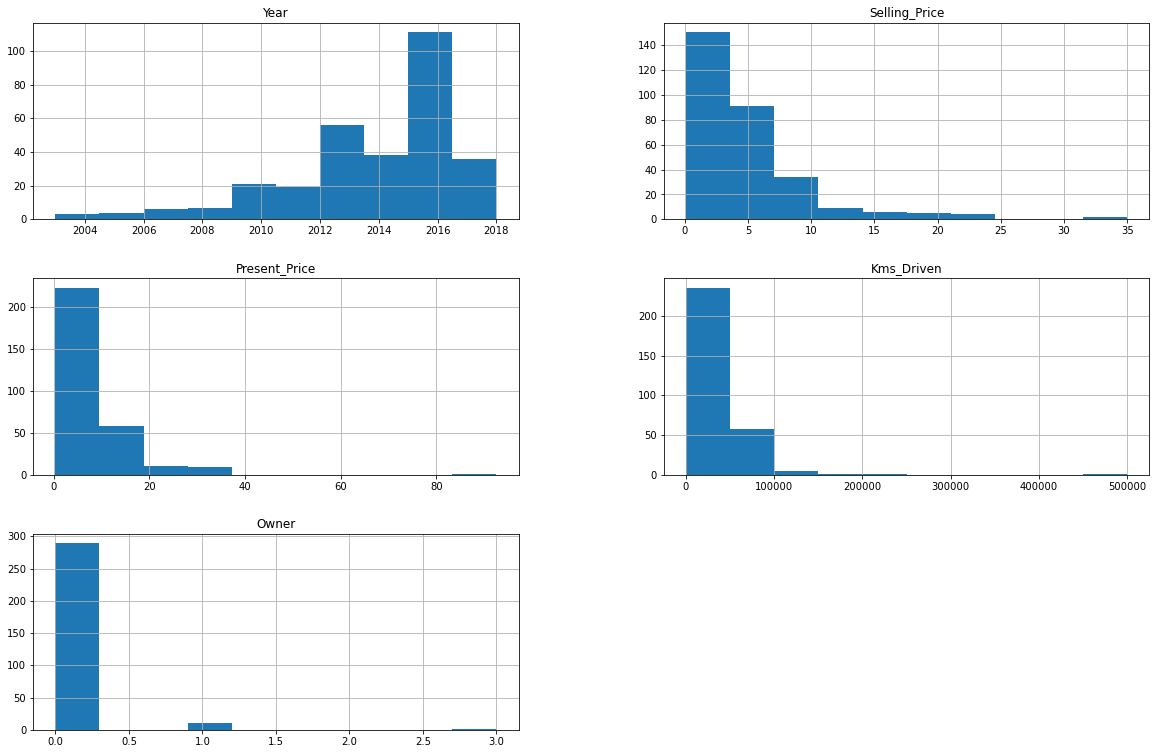

In [12]:
fig= plt.figure(figsize=(20,13))
ax= fig.gca()
df.hist(ax=ax)
plt.show()

In [13]:
for col in df.columns:
    print(col,':',len(df[col].unique()))

Car_Name : 98
Year : 16
Selling_Price : 156
Present_Price : 147
Kms_Driven : 206
Fuel_Type : 3
Seller_Type : 2
Transmission : 2
Owner : 3


In [14]:
#checking for unique value counts
for i in df.columns:
    print(df[str(i)].value_counts())
    print('\n')

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
ignis                  1
Hyosung GT250R         1
Bajaj Discover 100     1
land cruiser           1
Hero  Ignitor Disc     1
Name: Car_Name, Length: 98, dtype: int64


2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2005     4
2006     4
2003     2
2007     2
2004     1
2018     1
Name: Year, dtype: int64


0.60     8
0.45     8
4.50     7
5.25     7
4.75     6
        ..
0.51     1
3.15     1
11.45    1
6.85     1
20.75    1
Name: Selling_Price, Length: 156, dtype: int64


9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
5.35      1
12.04     1
8.93      1
7.87      1
9.54      1
Name: Present_Price, Length: 147, dtype: int64


45000    9
15000    9
35000    5
25000    5
50000    5
        ..
56001    1
21700    1
13000    1
4300     1
44542    1
Name: K

In [15]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
df.select_dtypes(include='object').columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [17]:
df.select_dtypes(include=['float64','int64']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

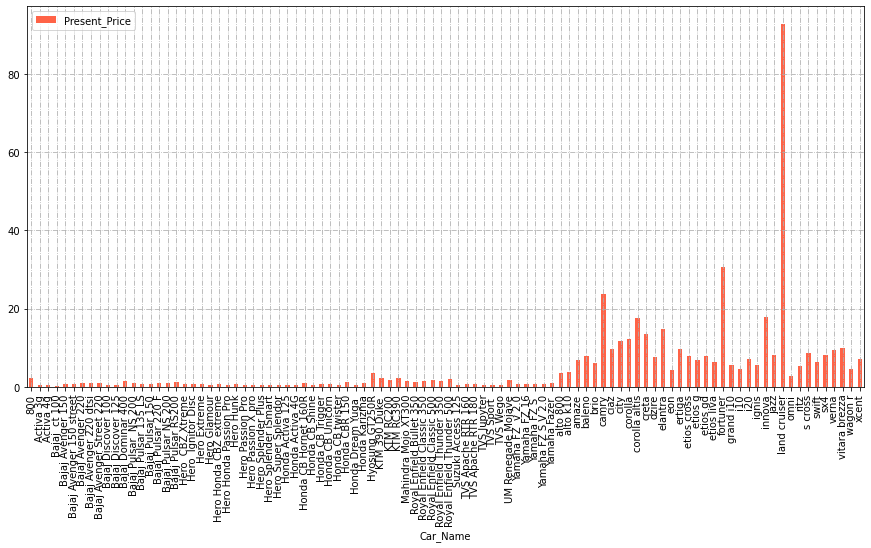

In [18]:
BrandVsPrice=pd.DataFrame(df.groupby('Car_Name')['Present_Price'].mean())
BrandVsPrice.plot.bar(color='tomato',figsize=(15,7))
plt.grid(linestyle='-.')
plt.show()

In [19]:
df=df.drop(columns='Car_Name')

In [20]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
df['Current_Year']=2021

In [22]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [23]:
df['Years_Old']=df['Current_Year']-df['Year']

In [24]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Years_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [25]:
df=df.drop(columns=['Year','Current_Year'])
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


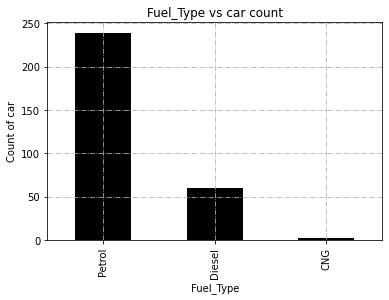

In [26]:
#fuel-type
plt.xlabel("Fuel_Type")
plt.ylabel("Count of car")
df['Fuel_Type'].value_counts().plot(kind='bar',title='Fuel_Type vs car count',color='black')
plt.grid(linestyle='-.')


In [27]:
df=pd.get_dummies(data=df,drop_first=True)

In [28]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [29]:
df.shape

(301, 9)

C:\Users\naziy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Present_Price', ylabel='Density'>

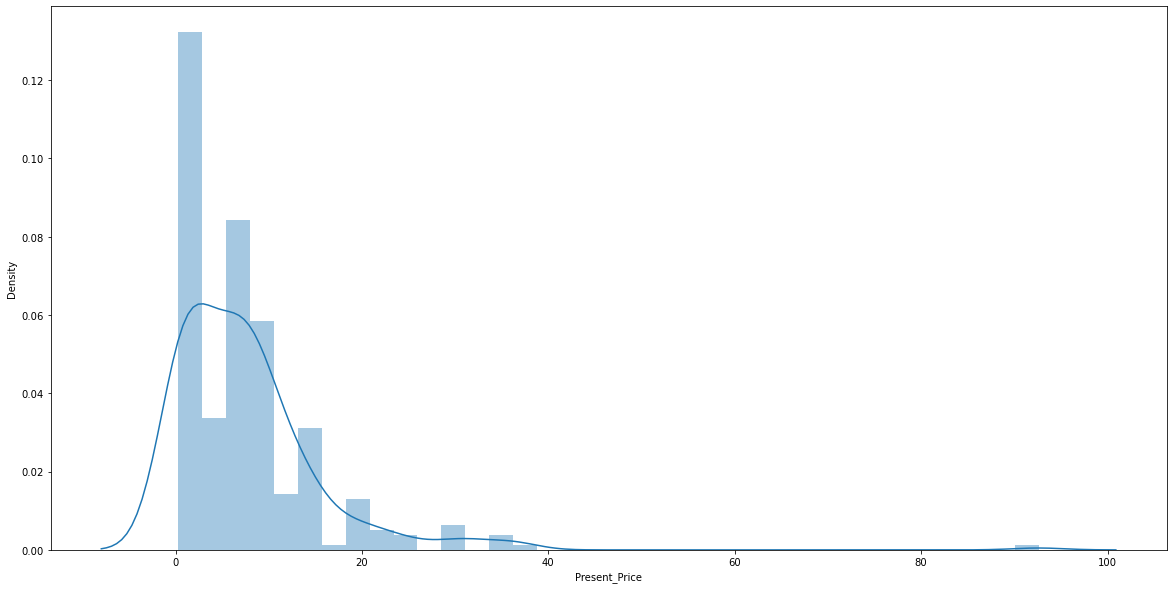

In [30]:
plt.figure(figsize=(20,10))
sns.distplot(df['Present_Price'])

In [31]:
x=df.drop(columns='Selling_Price')

In [32]:
y=df['Selling_Price']

In [33]:
x.head()

,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [34]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
x_train.shape

(240, 8)

In [37]:
x_test.shape

(61, 8)

In [38]:
y_train.shape

(240,)

In [39]:
y_test.shape

(61,)

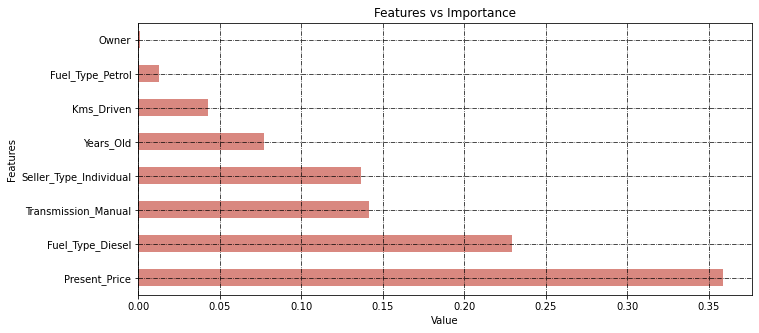

In [40]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
#use inbuilt class feature_importances of ExtraTreeRegressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(11,5))
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Features vs Importance")
plt.grid()
feat_importances.nlargest(10).plot(kind='barh',color='#D98880')##45B39D
plt.grid(color='black', linestyle='-.', linewidth=0.7)
plt.show()

In [41]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [42]:
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test,y_pred)

0.9547102613117737

In [45]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

y_pred = regression_model.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print(' test data: ', regression_model.score(x_test, y_test))

r2_score: 0.914434297222852
 test data:  0.914434297222852


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 500)
rf_model.fit(x_train,y_train)
RandomForestRegressorScore = rf_model.score(x_test, y_test)
print('test data: ', rf_model.score(x_test, y_test))


test data:  0.9567425804487684


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
GradientBoostingRegressorScore = gbr.score(x_test, y_test)
gbr_test_pred = gbr.predict(x_test)
print('test data: ', gbr.score(x_test, y_test))

test data:  0.9625890958211019


In [48]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [49]:
single_obs=[[8.5,3500,1,5,1,0,0,0]]

In [51]:
print('the car price is:',gbr.predict(single_obs))

the car price is: [7.48740109]
